<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/sampling_generate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline

In [78]:
# numpy.random.normal(loc=0.0, scale=1.0, size=None)
# generate sample of 200 values that follow a normal distribution 
# data = normal(loc=0, scale=1, size=200)

data = pd.DataFrame({"zt1" : normal(0, 1, 50000),
                     "zt2" : normal(0, 1, 50000),
                     "zt3" : normal(0, 1, 50000)})
data

,zt1,zt2,zt3
0,1.286552,1.539995,-0.316308
1,0.664742,-0.287093,-1.680858
2,2.077748,-0.016730,-0.546142
3,-1.312654,-0.107248,1.261761
4,1.143421,0.666512,-0.047930
...,...,...,...
49995,-2.337874,-0.459071,-0.358023
49996,0.608177,-0.311248,0.772932
49997,-1.177057,0.539889,-1.727614
49998,0.017008,-0.424500,-0.842896


In [79]:
n=50
rep=1
table_data_all=pd.DataFrame({"rep":[]})
data_copy=data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:]
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy()
        data_copy=pd.DataFrame({"":[]})
    #=========================
    p = 0

    Zt1 = data_new['zt1']
    Zt2 = data_new['zt2']
    Zt3 = data_new['zt3']

    xt1 = (1-(p**2))**(1/2)*Zt1
    xt2 = (1-(p**2))**(1/2)*Zt2
    xt3 = (1-(p**2))**(1/2)*Zt3

    new_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                             'Xt2' : data_new['zt2'],
                             'Xt3' : data_new['zt3'],
                             'e'   : normal(0, xt2**4, n)})


    table_data = pd.DataFrame({'Xt1' : data_new['zt1'],
                               'Xt2' : data_new['zt2'],
                               'Xt3' : data_new['zt3'],
                               'e'   : new_data['e']})
  

    table_data['Y'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']+table_data['e']
    #table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    # display(table_data)
    rep+=1
    if rep==100:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

Xt1       Xt2       Xt3             e          Y      Y_hat
rep  index                                                                  
1.0  0.0    0.069645 -0.918683 -0.463750 -1.634093e-01   0.816924   0.980334
     1.0   -0.746052  0.148471 -0.586224 -3.631544e-04   1.813517   1.813881
     2.0   -0.154235  0.021955 -1.458955 -2.881064e-09  -1.281000  -1.281000
     3.0   -0.625942  0.730017  1.859697 -4.962587e-02  11.489931  11.539556
     4.0   -0.018494  0.597656 -0.968221 -6.897144e-02   1.334521   1.403493
...              ...       ...       ...           ...        ...        ...
99.0 45.0  -0.113507 -1.115412 -1.094676 -9.203927e-02  -1.751394  -1.659355
     46.0  -0.771018 -1.654304 -0.607866 -3.163775e-01  -1.294558  -0.978180
     47.0   1.245264  0.571566 -0.305051 -9.818286e-02   4.159089   4.257272
     48.0   0.783769  0.327438 -0.536769  3.281134e-03   2.875578   2.872296
     49.0  -0.831017  0.898283 -0.726642  1.209873e+00   3.608980   2.399107

[4950 rows x 6 columns]

In [80]:
x = table_data_all[['Xt1', 'Xt2', 'Xt3',]]
y = table_data_all['Y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

In [81]:
y_pred = model.predict(x)
y_pred
#print('predicted response:', model.predict(x), sep='\n')

rep   index
1.0   0.0       1.338112
      1.0       1.753239
      2.0      -1.159026
      3.0      10.677476
      4.0       1.127589
                 ...    
99.0  45.0     -1.056630
      46.0     -0.144613
      47.0      3.731354
      48.0      2.560367
      49.0      2.006825
Length: 4950, dtype: float64

In [83]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df

Actual  Predicted
rep  index                      
1.0  0.0     0.816924   1.338112
     1.0     1.813517   1.753239
     2.0    -1.281000  -1.159026
     3.0    11.489931  10.677476
     4.0     1.334521   1.127589
...               ...        ...
99.0 45.0   -1.751394  -1.056630
     46.0   -1.294558  -0.144613
     47.0    4.159089   3.731354
     48.0    2.875578   2.560367
     49.0    3.608980   2.006825

[4950 rows x 2 columns]

In [90]:
table_data_new = pd.DataFrame({'Xt1'   : table_data_all['Xt1'],
                               'Xt2'   : table_data_all['Xt2'],
                               'Xt3'   : table_data_all['Xt3'],
                               'e'     : table_data_all['e'],
                               'Y'     : df['Actual'],
                               'y_hat' : df['Predicted']})
table_data_new['e_hat'] = table_data_new['Y']-table_data_new['y_hat']
table_data_new

Xt1       Xt2       Xt3  ...          Y      y_hat     e_hat
rep  index                                ...                                
1.0  0.0    0.069645 -0.918683 -0.463750  ...   0.816924   1.338112 -0.521187
     1.0   -0.746052  0.148471 -0.586224  ...   1.813517   1.753239  0.060278
     2.0   -0.154235  0.021955 -1.458955  ...  -1.281000  -1.159026 -0.121974
     3.0   -0.625942  0.730017  1.859697  ...  11.489931  10.677476  0.812455
     4.0   -0.018494  0.597656 -0.968221  ...   1.334521   1.127589  0.206932
...              ...       ...       ...  ...        ...        ...       ...
99.0 45.0  -0.113507 -1.115412 -1.094676  ...  -1.751394  -1.056630 -0.694764
     46.0  -0.771018 -1.654304 -0.607866  ...  -1.294558  -0.144613 -1.149945
     47.0   1.245264  0.571566 -0.305051  ...   4.159089   3.731354  0.427735
     48.0   0.783769  0.327438 -0.536769  ...   2.875578   2.560367  0.315211
     49.0  -0.831017  0.898283 -0.726642  ...   3.608980   2.006825  1.602156

[4950 rows x 7 columns]

In [91]:
table_data_new.mean()

Xt1      1.614386e-02
Xt2      1.320265e-02
Xt3     -7.663832e-03
e       -1.893418e-01
Y        3.809330e+00
y_hat    3.809330e+00
e_hat   -1.795197e-16
dtype: float64

In [92]:
table_data_new.var()

Xt1        0.998052
Xt2        0.994773
Xt3        1.016327
e        108.504170
Y        121.165119
y_hat     12.959275
e_hat    108.205844
dtype: float64

In [93]:
# Compute pairwise correlation of columns, excluding NA/null values.
table_data_new.corr()

,Xt1,Xt2,Xt3,e,Y,y_hat,e_hat
Xt1,1.000000e+00,1.837290e-03,1.145146e-02,-0.009909,0.030952,9.464335e-02,-2.691889e-17
Xt2,1.837290e-03,1.000000e+00,1.821467e-02,-0.047505,0.097032,2.966968e-01,-1.655331e-16
Xt3,1.145146e-02,1.821467e-02,1.000000e+00,-0.020880,0.312842,9.565835e-01,-3.385920e-17
e,-9.908566e-03,-4.750485e-02,-2.087953e-02,1.000000,0.932612,-3.393653e-02,9.986243e-01
Y,3.095221e-02,9.703187e-02,3.128415e-01,0.932612,1.000000,3.270405e-01,9.450103e-01
y_hat,9.464335e-02,2.966968e-01,9.565835e-01,-0.033937,0.327041,1.000000e+00,-7.575112e-17
e_hat,-2.691889e-17,-1.655331e-16,-3.385920e-17,0.998624,0.945010,-7.575112e-17,1.000000e+00


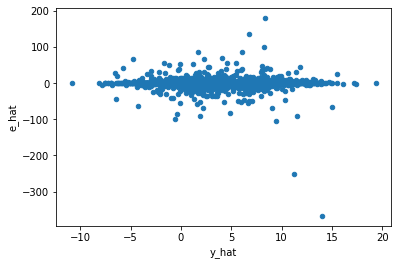

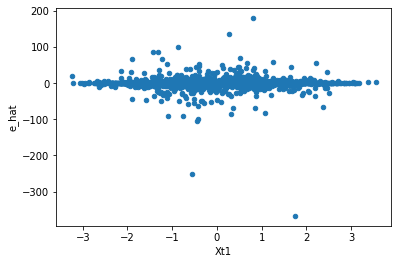

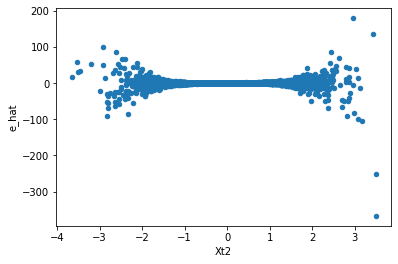

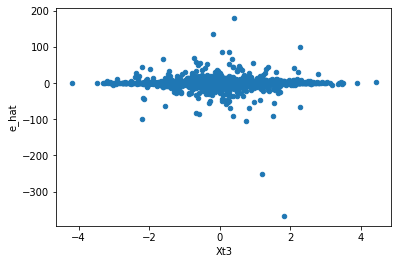

In [94]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='Xt3', y='e_hat', kind = 'scatter')